In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [8]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

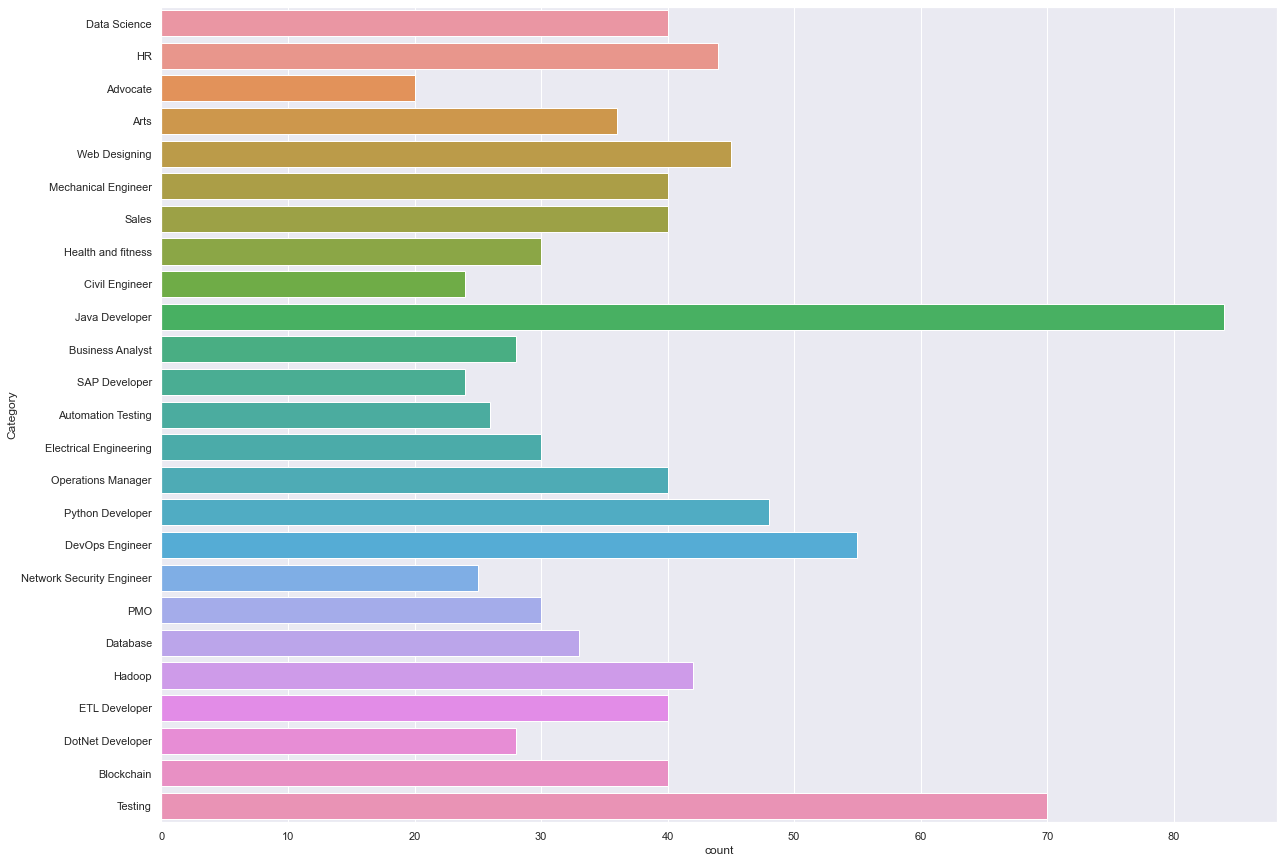

In [9]:
plt.figure(figsize=(20,15))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Category", data=df)
plt.show()

0                Java Developer
1                       Testing
2               DevOps Engineer
3              Python Developer
4                 Web Designing
5                            HR
6                        Hadoop
7                 ETL Developer
8                  Data Science
9            Operations Manager
10                   Blockchain
11                        Sales
12          Mechanical Engineer
13                         Arts
14                     Database
15       Electrical Engineering
16                          PMO
17           Health and fitness
18             DotNet Developer
19             Business Analyst
20           Automation Testing
21    Network Security Engineer
22               Civil Engineer
23                SAP Developer
24                     Advocate
Name: index, dtype: object 0     84
1     70
2     55
3     48
4     45
5     44
6     42
7     40
8     40
9     40
10    40
11    40
12    40
13    36
14    33
15    30
16    30
17    30
18    28
19

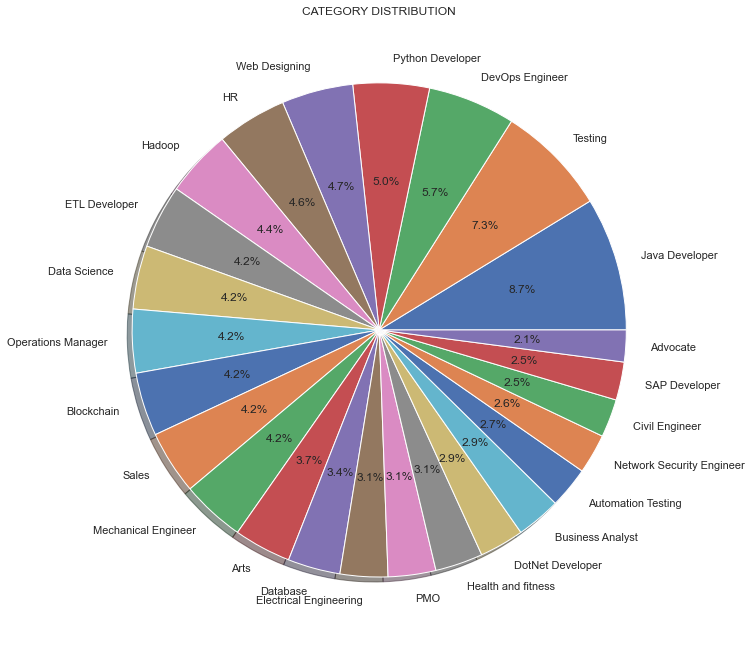

In [10]:
#Pie-chart
targetCounts = df['Category'].value_counts().reset_index()['Category']
targetLabels  = df['Category'].value_counts().reset_index()['index']
print(targetLabels, targetCounts)
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, )

In [11]:
df['Resume'] = df['Resume'].apply(lambda x: str(x).lower())

In [12]:
df['Resume'] = df['Resume'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

In [13]:
df['Resume'] = df['Resume'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [14]:
df['Resume'] = df['Resume'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

In [15]:
df['Resume'] = df['Resume'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [16]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [17]:
df['Resume'] = df['Resume'].apply(lambda x: remove_accented_chars(x))

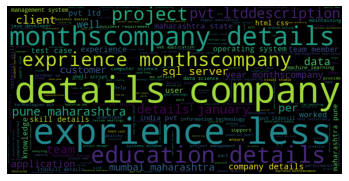

In [19]:
text = ' '.join(df['Resume'])
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [20]:
df['Resume']

0      skills  programming languages python pandas nu...
1      education details may 2013 to may 2017 be   ui...
2      areas of interest deep learning control system...
3      skills a r a python a sap hana a tableau a sap...
4      education details  mca   ymcaust  faridabad  h...
                             ...                        
957    computer skills a proficient in ms office word...
958    a willingness to accept the challenges a posit...
959    personal skills a quick learner a eagerness to...
960    computer skills  software knowledge mspower po...
961    skill set os windows xp788110 database mysql s...
Name: Resume, Length: 962, dtype: object

In [24]:
encoder = LabelEncoder()
var_mod = ['Category']
for i in var_mod:
    df[i] = encoder.fit_transform(df[i])

In [25]:
df

,Category,Resume
0,6,skills programming languages python pandas nu...
1,6,education details may 2013 to may 2017 be ui...
2,6,areas of interest deep learning control system...
3,6,skills a r a python a sap hana a tableau a sap...
4,6,education details mca ymcaust faridabad h...
...,...,...
957,23,computer skills a proficient in ms office word...
958,23,a willingness to accept the challenges a posit...
959,23,personal skills a quick learner a eagerness to...
960,23,computer skills software knowledge mspower po...


In [27]:
text = df['Resume'].values
values = df['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500
)
word_vectorizer.fit(text)
WordResult = word_vectorizer.transform(text)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(WordResult, values, random_state=0, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

(769, 1500)
(769,)


In [35]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [38]:
#Results
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("n Classification report for classifier %s:n%sn" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99
n Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):n              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.

In [66]:
clf1 = RandomForestClassifier(n_estimators=100)

clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

In [67]:
#Results
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf1.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf1.score(X_test, y_test)))
print("n Classification report for classifier %s:n%sn" % (clf1, metrics.classification_report(y_test, prediction)))


Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 1.00
n Classification report for classifier RandomForestClassifier():n              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14    

In [72]:
model = XGBClassifier()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

[16:25:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [73]:
predictions = [round(value) for value in model_pred]

In [74]:
#Evaluate Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [100]:
model1 = AdaBoostClassifier(n_estimators=100, learning_rate=0.2)
model1.fit(X_train, y_train)
model_pred2 = model1.predict(X_test) 

In [101]:
predictions = [round(value) for value in model_pred2]
#Evaluate Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.49%
